In [9]:
import numpy as np
import pandas as pd

In [10]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers(2).xls to Mall_Customers(2).xls


In [11]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers(2).xls']))
df.shape

(200, 5)

In [12]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df["A"]= df[["Annual Income (k$)"]]
df["B"]= df[["Spending Score (1-100)"]]

In [14]:
X=df[["A", "B"]]
X.head()

,A,B
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline


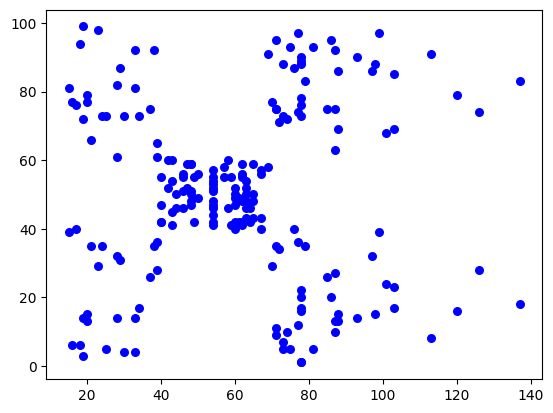

In [16]:
plt.scatter(X["A"], X["B"], s = 30, c = 'b')
plt.show()

In [17]:
Kmean = KMeans(n_clusters=5)
Kmean.fit(X)

centers=Kmean.cluster_centers_
print(Kmean.cluster_centers_)

[[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
clusters = Kmean.fit_predict(X)
df["label"] = clusters
df.head(100)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),A,B,label
0,1,Male,19,15,39,15,39,4
1,2,Male,21,15,81,15,81,3
2,3,Female,20,16,6,16,6,4
3,4,Female,23,16,77,16,77,3
4,5,Female,31,17,40,17,40,4
...,...,...,...,...,...,...,...,...
95,96,Male,24,60,52,60,52,1
96,97,Female,47,60,47,60,47,1
97,98,Female,27,60,50,60,50,1
98,99,Male,48,61,42,61,42,1


In [19]:
col = ['green', 'blue', 'black', 'yellow', 'orange']

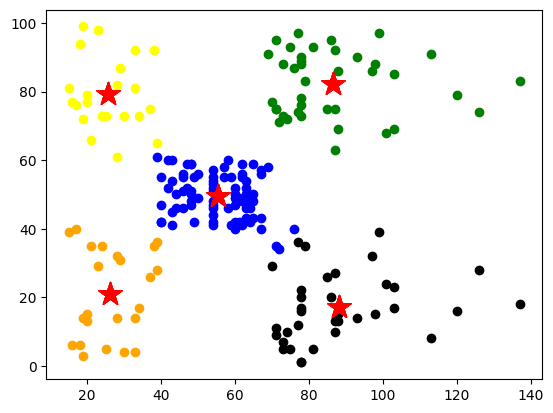

In [20]:
for i in range(5):
  a=col[i]
  # print (a)
  plt.scatter(df.A[df.label==i], df.B[df.label== i], c=a, label= 'cluster 1 ')
  plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=300, c='r', label='centroid')


In [21]:
X1= X.loc[:,["A","B"]].values


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

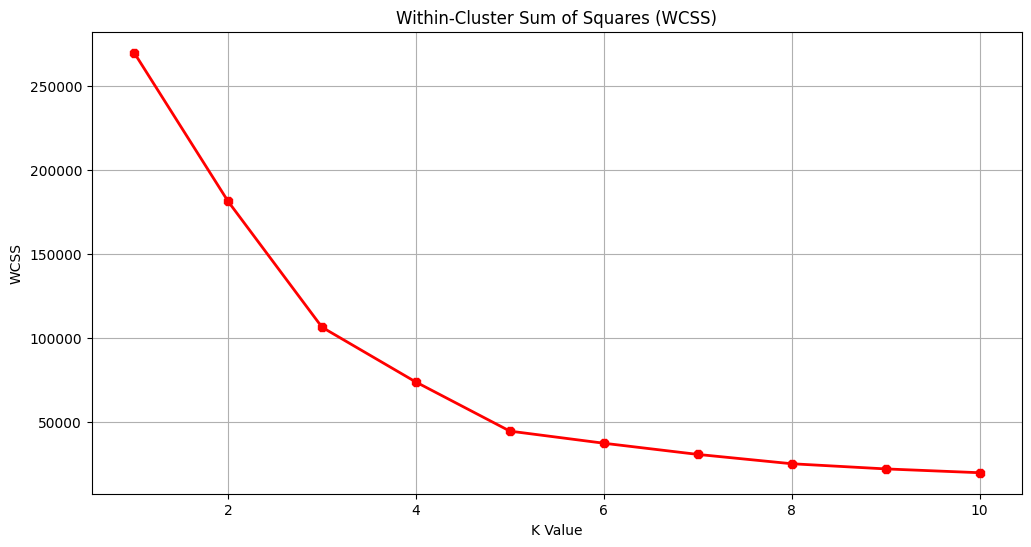

In [39]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.title("Within-Cluster Sum of Squares (WCSS)")
plt.show()